In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#scikitLearn
from sklearn.utils import class_weight, shuffle
from sklearn.metrics import f1_score, fbeta_score, cohen_kappa_score, accuracy_score
from sklearn.model_selection import train_test_split

#Keras
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.applications.resnet50 import preprocess_input
from keras.utils import Sequence
from keras.utils import to_categorical
from keras.legacy import interfaces
from keras.optimizers import Optimizer
from keras import backend as K

Using TensorFlow backend.


In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

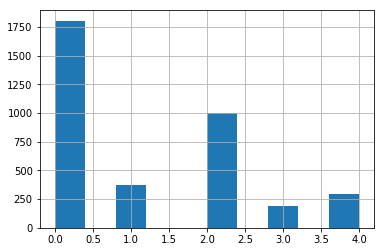

In [6]:
x = df_train['id_code']
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=8)
y.hist()

In [20]:
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [22]:
df_train.shape

(3662, 2)

In [23]:
df_train.describe()

,diagnosis
count,3662.000000
mean,1.126980
std,1.298409
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [24]:
df_train['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [42]:
#Is there any training data missing?
total_missing_records = df_train.isnull().sum().sort_values(ascending = False)
percent_missing_records = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_records, percent_missing_records], axis=1, keys=['Total Missing', 'Percent Missing']).transpose()

,diagnosis,id_code
Total Missing,0.0,0.0
Percent Missing,0.0,0.0


In [44]:
# Display some sample images from the provided images
def display_samples(df, data_type, columns, rows):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_id_code = df.loc[i,'id_code']
        if(data_type == 'train'):
            image_diagnosis = df.loc[i,'diagnosis']
            img = cv2.imread(f'train_images/{image_id_code}.png')
        else:
            img = cv2.imread(f'test_images/{image_id_code}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        # Only training images have diagnosis column
        if(data_type == 'train'):
            plt.title(image_diagnosis)
        plt.imshow(img)
    
    plt.tight_layout()

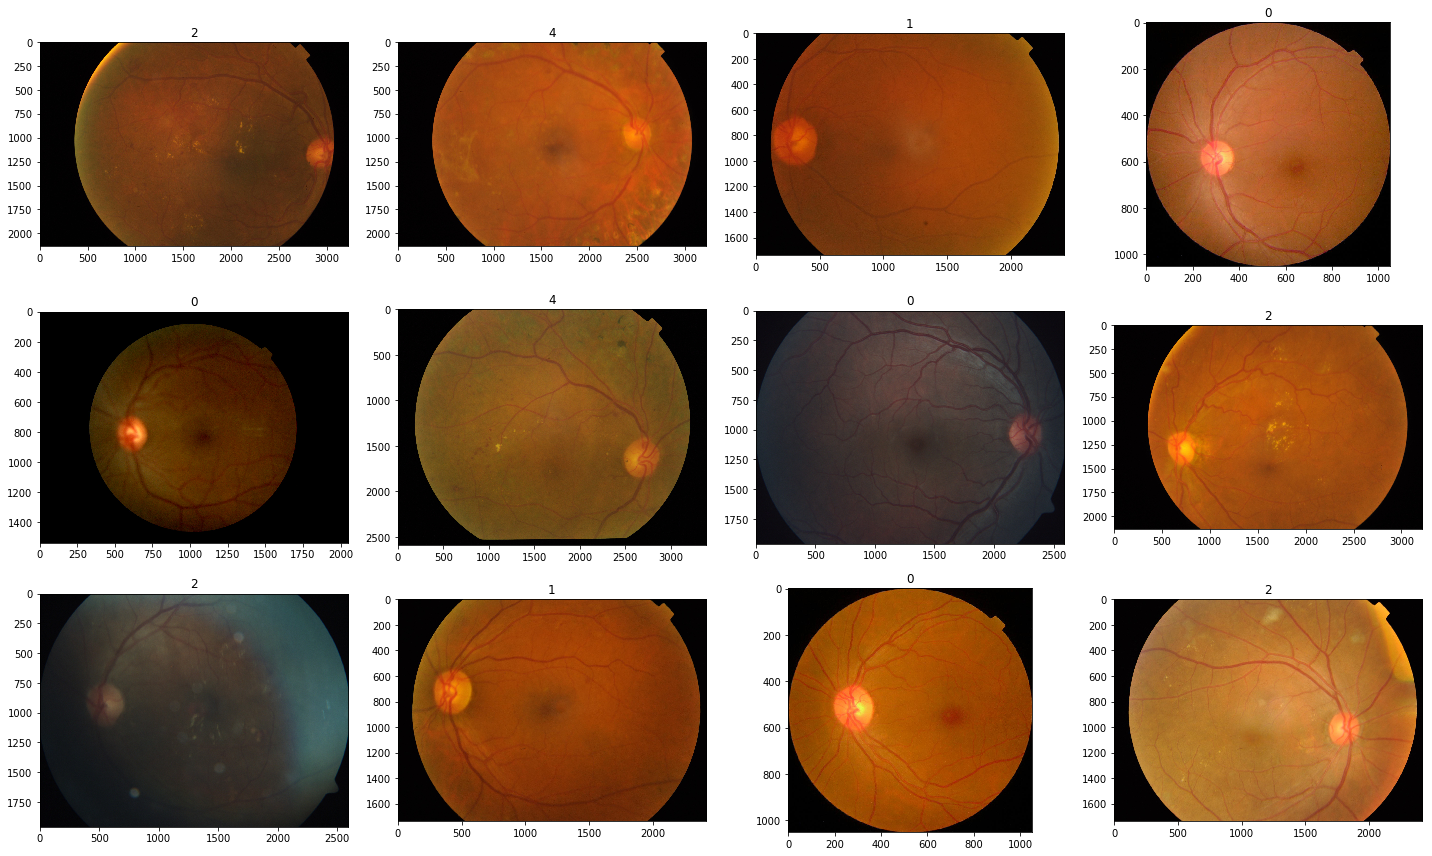

In [45]:
display_samples(df_train, 'train', 4, 3)

In [37]:
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [38]:
df_test.shape

(1928, 1)

In [39]:
df_test.describe()

,id_code
count,1928
unique,1928
top,9d19500e74c9
freq,1


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
id_code    1928 non-null object
dtypes: object(1)
memory usage: 15.1+ KB


In [46]:
#Is there any training data missing?
total_missing_records = df_test.isnull().sum().sort_values(ascending = False)
percent_missing_records = (df_test.isnull().sum()/df_test.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_records, percent_missing_records], axis=1, keys=['Total Missing', 'Percent Missing']).transpose()

,id_code
Total Missing,0.0
Percent Missing,0.0


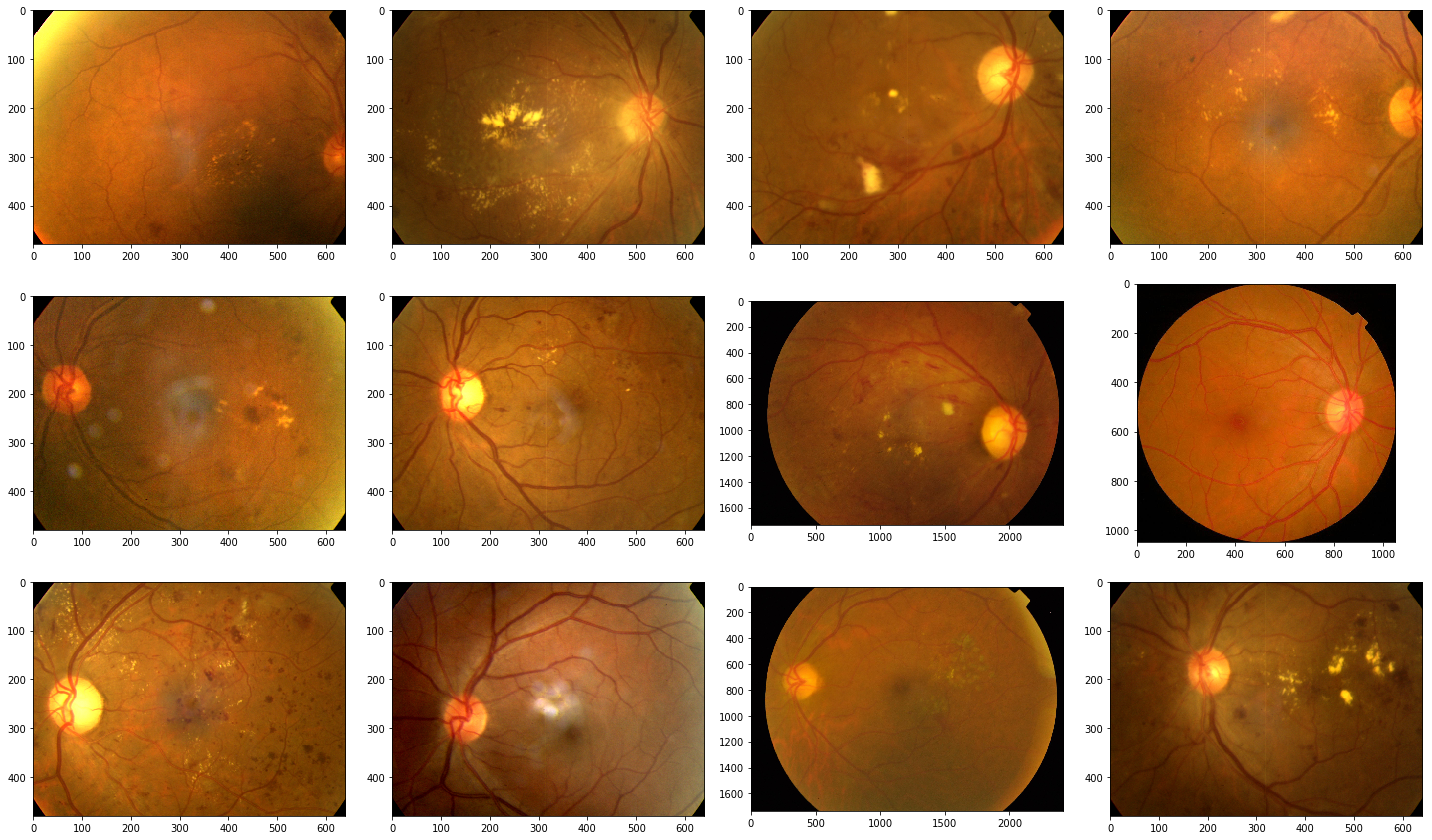

In [35]:
display_samples(df_test, 'test', 4, 3)